In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

https://imagecolorpicker.com/

In [2]:
ff_data = pd.read_excel("../COP28_delegates_ff_organizations_renamed_filtered_check.xlsx")
ff_data["count"] = 1

In [3]:
party_names = pd.read_csv("../../orgs/org_list_party.csv",encoding = 'utf8')
ngo_names = pd.read_csv("../../orgs/org_list_ngo.csv",encoding = 'utf8')
ngo_names_match = pd.read_excel("../../orgs/org_list_ngo_check.xlsx",sheet_name="match")

In [12]:
main_groups = ff_data.copy()

# add party names
for i in main_groups.index:
    nominator = main_groups.loc[i,"nominator"]
    
    # party members
    if nominator in party_names["party"].unique(): 
        main_groups.loc[i,"nominator_type"] = main_groups.loc[i,"type"]
        #party_names.query("party==@nominator")["type"].iloc[0]
        main_groups.loc[i,"country"] = nominator
        main_groups.loc[i,"nominator_rename"] = nominator + "  "
    # non party organizations
    elif nominator in ngo_names_match["nominator"].unique(): 
        matched_name = ngo_names_match.query("nominator==@nominator")["matched_name"].iloc[0]
        matched_name = matched_name.replace("Ã³","ó").replace("Ã§","ç").replace("Ã©","é").replace("Ã±","ñ")
        if matched_name == 'Comité 21 / Club France Développement Durable':
            main_groups.loc[i,"nominator_type"] = 'Constituency - Business and Industry'
        else:
            main_groups.loc[i,"nominator_type"] = ngo_names.query("Organization==@matched_name")["Constituency"].iloc[0].replace(" CAN","")
        main_groups.loc[i,"country"] = ngo_names.query("Organization==@matched_name")["Country"].iloc[0]
        main_groups.loc[i,"nominator_rename"] = nominator
    elif nominator in ["Host country guests","Conference Invitees"]:
        main_groups.loc[i,"nominator_type"] = "Host"
        main_groups.loc[i,"country"] = "United Arab Emirates"
        main_groups.loc[i,"nominator_rename"] = nominator
    elif nominator in ["World Bank Group","Global Climate Action"]:
        main_groups.loc[i,"nominator_type"] = "United Nations Organization"
        main_groups.loc[i,"country"] = "International"
        main_groups.loc[i,"nominator_rename"] = nominator
main_groups = main_groups.drop(columns="type")
main_groups = pd.merge(main_groups,party_names[["party","type"]],left_on="country",right_on="party",how="left")
main_groups = main_groups.rename(columns={"type":"country_type"})
main_groups["country_type"] = main_groups["country_type"].fillna("Non-Country")
#main_groups.set_index("nominator").to_csv("test.csv")
main_groups

,nominator,name,func_title,department,organization,relation,new_organization,count,nominator_type,country,nominator_rename,party,country_type
0,Bosnia and Herzegovina,Mr. Damir Ahmovic,"President, Europe for the new global emterprise",Energy,Alfa Energy Group (part of Edison Energy),Alfa Energy Group (part of Edison Energy),Edison,1,Parties,Bosnia and Herzegovina,Bosnia and Herzegovina,Bosnia and Herzegovina,Non-Annex
1,Brazil,Mr. Sergio Caetano Leite,Chief,Financial and Investor Relations Department,Petrobras,Paid relationship/contract with an affiliate/m...,Petrobras,1,Parties,Brazil,Brazil,Brazil,Non-Annex
2,Brazil,Ms. Viviana Canhão Bernardes Gonçalves Coelho,Climate change and decarbonization executive m...,Climate change and decarbonization executive m...,Petrobras,Paid relationship/contract with an affiliate/m...,Petrobras,1,Parties,Brazil,Brazil,Brazil,Non-Annex
3,Brazil,Ms. Gregório da Cruz Araújo Maciel,Environmental Project Manager,Social Responsibility,Petrobras,Guest of the nominating entity,Petrobras,1,Parties,Brazil,Brazil,Brazil,Non-Annex
4,Brazil,Mr. Flaubert Matos Machado,"Executive Health, Environment & Safety Manager","Executive Health, Environment & Safety Manager",Petrobras,Paid relationship/contract with an affiliate/m...,Petrobras,1,Parties,Brazil,Brazil,Brazil,Non-Annex
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Host country guests,Mr. Akinwole Omoboriowo Ii,Ceo & Chairman,ENERGY INSFRASTRUCTURE DEVELOPMENT,GENESIS ENERGY GROUP,Speaker,Genesis Energy,1,Host,United Arab Emirates,Host country guests,United Arab Emirates,Non-Annex
376,Host country guests,Mr. Sultan Al Dhaheri,Planning Engineer,Planning,ADNOC,Not specified,ADNOC,1,Host,United Arab Emirates,Host country guests,United Arab Emirates,Non-Annex
377,Host country guests,Ms. Kimberly Kapesi,Senior Legal Counsel,Legal,TAQA,Guest of the nominating entity,TAQA,1,Host,United Arab Emirates,Host country guests,United Arab Emirates,Non-Annex
378,Host country guests,Mr. Amit Singh,CEO,Executive Office,Adani Green Energy,Guest of the nominating entity,Adani Group,1,Host,United Arab Emirates,Host country guests,United Arab Emirates,Non-Annex


In [11]:
main_groups["country_type"].unique()

array(['Non-Annex', 'Annex I Only', 'Annex II', nan], dtype=object)

In [5]:
# highlight those with more than 10 delegates
# countries in the country list 
country_summary = main_groups.groupby("country").sum()[["count"]]
country_summary = country_summary[country_summary["count"]>=10]

# non countries in the nominator list 
nominator_summary = main_groups.groupby("nominator_rename").sum()[["count"]]
nominator_summary = nominator_summary[nominator_summary["count"]>=10]
# countries in the nominator list 
main_groups_parties = main_groups[main_groups["nominator_type"].isin(['Parties', 'Party overflow',"Host"])]
country_list_non_annex = list(main_groups_parties.query("country_type=='Non-Annex'")["nominator_rename"].unique())
main_groups_parties_annex = main_groups_parties[main_groups_parties["country_type"]!="Non-Annex"]
country_list_annex = list(main_groups_parties_annex["nominator_rename"].unique())
# companies 
company_summary = main_groups.groupby("new_organization").sum()[["count"]]
company_summary = company_summary[company_summary["count"]>=10]
nominator_summary

,count
nominator_rename,
Brazil,10
Canada,15
China,11
France,20
Host country guests,66
International Chamber of Commerce,10
Malaysia,23
Russian Federation,28
Thailand,26


In [18]:
country_type_list[:-1]

['Non-Annex', 'Annex I Only', 'Annex II']

In [27]:
# NODES
country_type_list = list(main_groups["country_type"].unique())
country_list = list(main_groups["country"].unique())
country_list_noInt = [item for item in country_list if item !="International" ]
org_type_list = list(main_groups["nominator_type"].dropna().unique())
nominator_list = list(main_groups["nominator_rename"].dropna().unique())
ff_company_list = list(main_groups["new_organization"].unique())
ngo_list = list(ngo_names["Constituency"].unique())

index_db = pd.DataFrame(data={"name":country_type_list+country_list+org_type_list+nominator_list+ff_company_list})
index_db = index_db.reset_index().rename(columns={"index":"code"})

for i in index_db.index:
    # colors
    if index_db.loc[i,"name"] in country_type_list[:-1]+country_list_noInt+country_list_non_annex+country_list_annex:
        index_db.loc[i,"color"] = "palevioletred"
        if index_db.loc[i,"name"] in list(["Non-Annex"])+list(main_groups[main_groups["country_type"]=="Non-Annex"]["country"].unique())+country_list_non_annex:
            index_db.loc[i,"color"] = "purple"
    elif index_db.loc[i,"name"] in ngo_list+list(main_groups[main_groups["nominator_type"].isin(ngo_list)]["nominator_rename"].unique()):
        index_db.loc[i,"color"] = "dodgerblue"
        if index_db.loc[i,"name"] in list(["Constituency - Business and Industry"])+list(main_groups[main_groups["nominator_type"]=="Constituency - Business and Industry"]["nominator"].unique()):
            index_db.loc[i,"color"] = "navy"
    else:
        index_db.loc[i,"color"] = "gray"
        
    # names to show
    if index_db.loc[i,"name"] in country_type_list+org_type_list+list(company_summary.index)+list(country_summary.index)+list(nominator_summary.index):
        index_db.loc[i,"name_show"] = index_db.loc[i,"name"] 

index_db["name_show"] = index_db["name_show"].fillna("")
index_db["name_show"] = index_db["name_show"].str.replace("Constituency -","NGO")
index_db["name_show"] = index_db["name_show"].str.replace("United Kingdom of Great Britain and Northern Ireland","United Kingdom")
index_db["name_show"] = index_db["name_show"].str.replace("International Chamber of Commerce","ICC")
index_db["name_show"] = index_db["name_show"].str.replace("United Nations Organization","United Nations")
index_db.set_index("code").to_excel("nodes_fossil.xlsx")
index_db

,code,name,color,name_show
0,0,Non-Annex,purple,Non-Annex
1,1,Annex I Only,palevioletred,Annex I Only
2,2,Annex II,palevioletred,Annex II
3,3,Non-Country,gray,Non-Country
4,4,Bosnia and Herzegovina,purple,
...,...,...,...,...
184,184,Pembina Pipeline,gray,
185,185,Centrica,gray,
186,186,inpex,gray,
187,187,ADNOC,gray,ADNOC


In [28]:
def calc_link(db,index_db,left_name,right_name,plot_type):
    result_link = db.groupby([left_name,right_name]).sum()[["count"]].reset_index()
    if plot_type==0:
        result_link = pd.merge(result_link,index_db[["name","code","color"]],left_on=left_name,right_on="name")
    elif plot_type==1:
        result_link = pd.merge(result_link,index_db[["name","code"]],left_on=left_name,right_on="name")
    result_link = result_link.rename(columns={"code":"source_index"})
    if plot_type==0:
        result_link = pd.merge(result_link,index_db[["name","code"]],left_on=right_name,right_on="name")
    elif plot_type==1:
        result_link = pd.merge(result_link,index_db[["name","code","color"]],left_on=right_name,right_on="name")
    result_link = result_link.rename(columns={"code":"target_index"})
    #result_link = result_link[["source_index","target_index","count","color"]]
    result_link = result_link.replace("palevioletred","#fbf1f4").replace("purple","#f2e6f2").replace("navy","#e6e6f2").replace("dodgerblue","#e9f4ff").replace("gray","#f2f2f2")
    return result_link

In [29]:
# LINKS
# country type to country
cntry_type = calc_link(main_groups,index_db,"country_type","country",0)
# country to nominator type
cntry2nomtype = calc_link(main_groups,index_db,"country","nominator_type",0)
# nominator type to nominator
nomtype2nom = calc_link(main_groups,index_db,"nominator_type","nominator_rename",1)
# nominator to company
nom2comp = calc_link(main_groups,index_db,"nominator_rename","new_organization",0)
combined_list = pd.concat([cntry_type,cntry2nomtype,nomtype2nom,nom2comp])
combined_list.set_index("source_index").to_excel("links_fossil.xlsx")

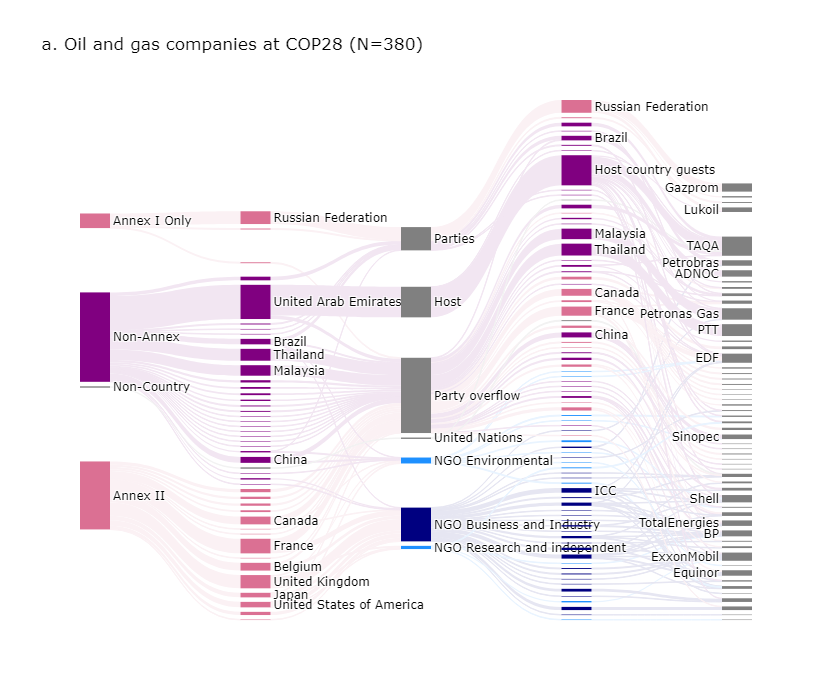

In [30]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 5,
      thickness = 30,
      line = dict(color = "black", width = 0),
      #label = index_db["name"],
      label=  index_db["name_show"],
      color = index_db["color"]
    ),
    link = dict(
      source = combined_list["source_index"], 
      target = combined_list["target_index"],
      value = combined_list["count"],
        color = combined_list["color"]
    ))],
       layout =  dict(
    title = "a. Oil and gas companies at COP28 (N=380)",
    height = 700,
    width = 1000,
    font = dict(
      size = 12,
        color="black"
    )        ))

fig.show()
fig.write_image("sankey_fossil_fuel.png", scale=2)